In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [98]:
## Acceder a datos de manera remota
datos_futbol = pd.read_csv('https://raw.githubusercontent.com/cienciadedatos/datos-de-miercoles/master/datos/2019/2019-04-10/partidos.txt', sep='\t')
datos_futbol.head()

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final
0,1930,Uruguay,Estadio Pocitos,Montevideo,(1),1930-07-13,Francia,Mexico,4,1
1,1930,Uruguay,Estadio Parque Central,Montevideo,(2),1930-07-13,Estados Unidos,Bélgica,3,0
2,1930,Uruguay,Estadio Parque Central,Montevideo,(3),1930-07-14,Yugoslavia,Brasil,2,1
3,1930,Uruguay,Estadio Pocitos,Montevideo,(4),1930-07-14,Rumania,Perú,3,1
4,1930,Uruguay,Estadio Parque Central,Montevideo,(5),1930-07-15,Argentina,Francia,1,0


# Gráfico 1:
En el presente gráfico se pretende comparar el total de goles que han marcado los países "Bélgica" versus "Ghana" a lo largo de la historia de los mundiales en su condición de 'equipo_1', para sacar este resultado, se siguen los siguientes pasos:

In [105]:
goles_totales = datos_futbol[(datos_futbol.equipo_1 == 'Bélgica') | (datos_futbol.equipo_1 == 'Colombia')].groupby('equipo_1')['equipo_1_final'].sum().reset_index()
goles_totales

,equipo_1,equipo_1_final
0,Bélgica,38
1,Colombia,13


No handles with labels found to put in legend.


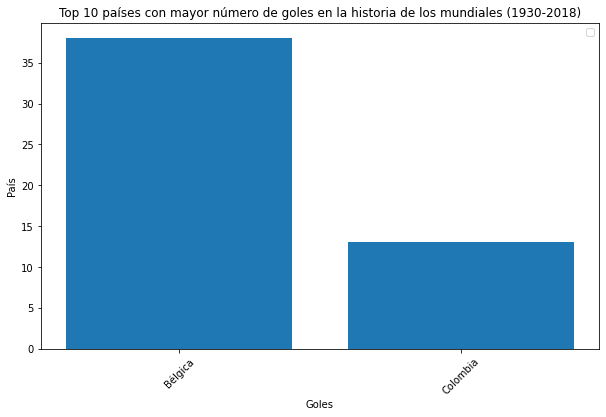

In [112]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.bar(goles_totales['equipo_1'], goles_totales['equipo_1_final'])
plt.xticks(rotation = 45)
plt.xlabel('Goles')
plt.ylabel('País')
plt.title('Top 10 países con mayor número de goles en la historia de los mundiales (1930-2018)')
plt.legend(loc = 'best')


In [99]:
## 1.1. Determinar los goles de cada país sumando los goles en sus dos momentos de juego, ya sea que el país haya sido equipo 1 o equipo 2.
## Para el desarrollo de este punto, se ejecutan dos dataframes que describen la cantidad de goles en las dos condiciones.
paises_goles1 = datos_futbol.groupby('equipo_1')['equipo_1_final'].sum().reset_index()
paises_goles2 = datos_futbol.groupby('equipo_2')['equipo_2_final'].sum().reset_index()


In [85]:
paises_goles1

,equipo_1,equipo_1_final
0,Alemania,67
1,Alemania del Este,3
2,Alemania occidental,97
3,Angola,0
4,Arabia Saudita,5
...,...,...
76,Ucrania,1
77,Unión Soviética,43
78,Uruguay,73
79,Yugoslavia,44


In [86]:
paises_goles2

,equipo_2,equipo_2_final
0,Alemania,24
1,Alemania del Este,2
2,Alemania occidental,43
3,Angola,0
4,Arabia Saudita,4
...,...,...
80,Ucrania,7
81,Unión Soviética,10
82,Uruguay,17
83,Yugoslavia,18


In [100]:
## 1.2. Estandarizar los nombres de las columnas en cada dataframe para posteriormente unirlas y poder sumar los goles
paises_goles1.columns = ['equipo', 'goles']
paises_goles2.columns = ['equipo', 'goles']

In [96]:
## 1.3. Concatenar las tablas y sumar para encontrar el total de goles por cada país
paises_goles = pd.concat([paises_goles1, paises_goles2]).groupby('equipo')['goles'].sum().reset_index()

c:\Users\fkva_\miniconda3\envs\modulo_python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


KeyError: 'equipo'

In [101]:
## 1.4. 
paises_goles3 = paises_goles1.set_index('equipo').join(paises_goles2.set_index('equipo'), lsuffix='_equipo_1', rsuffix='_equipo_2', how='outer')
paises_goles3

,goles_equipo_1,goles_equipo_2
equipo,,
Alemania,67.0,24
Alemania del Este,3.0,2
Alemania occidental,97.0,43
Angola,0.0,0
Arabia Saudita,5.0,4
...,...,...
Ucrania,1.0,7
Unión Soviética,43.0,10
Uruguay,73.0,17


In [ ]:
## 1.4. Seleccionar el Top 10 de países con más goles en la historia
top_10_paises_goles = paises_goles3.nlargest(10, 'goles')
top_10_paises_goles

Text(0.5, 1.0, 'Top 10 países con mayor número de goles en la historia de los mundiales (1930-2018)')

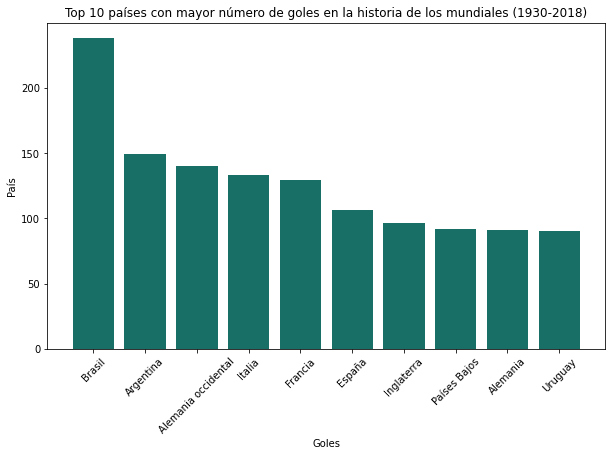

In [73]:
## 1.5. Ejecutar el gráfico 1
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.bar(top_10_paises_goles['equipo'], top_10_paises_goles['goles'], color='#186F65')
plt.xticks(rotation = 45)
plt.xlabel('Goles')
plt.ylabel('País')
plt.title('Top 10 países con mayor número de goles en la historia de los mundiales (1930-2018)')

In [91]:
## 1.1. Determinar los goles de cada país sumando los goles en sus dos momentos de juego, ya sea que el país haya sido equipo 1 o equipo 2.
## Para el desarrollo de este punto, se ejecutan dos dataframes que describen la cantidad de goles en las dos condiciones.
paises_comparacion = datos_futbol
paises_goles1 = paises_comparacion.groupby(['equipo_1', 'fecha'])['equipo_1_final'].sum().reset_index()
paises_goles2 = paises_comparacion.groupby(['equipo_1', 'fecha'])['equipo_2_final'].sum().reset_index()


In [93]:
paises_goles4 = paises_goles3[(paises_goles3.equipo == 'Bélgica') | (paises_goles3.equipo == 'Ghana')]

AttributeError: 'DataFrame' object has no attribute 'equipo'

<AxesSubplot:>

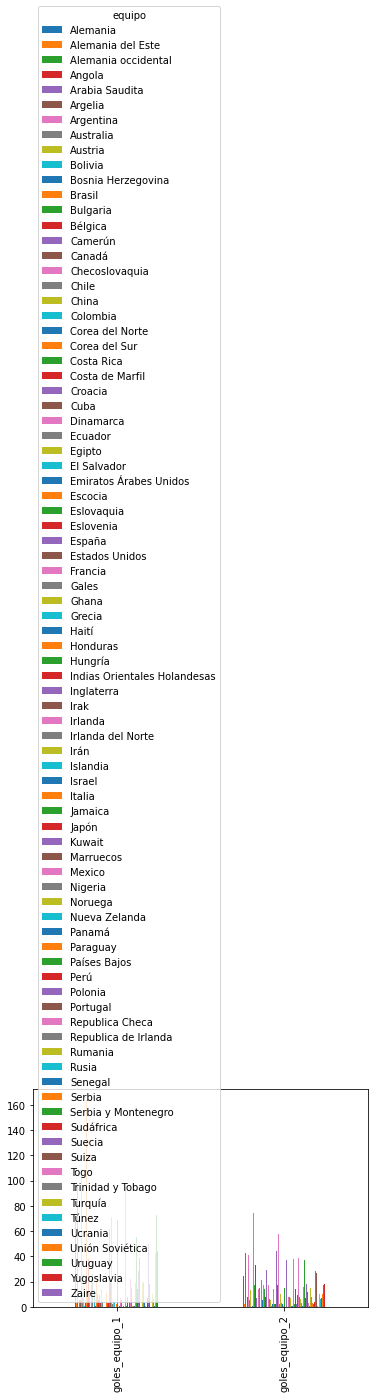

In [92]:
paises_goles3.T.plot(kind='bar')